<a href="https://colab.research.google.com/github/jvitordeoliveira96/UFRJ_courses/blob/main/ALA_ICP115/Tutorials/Introducao_ao_Colab_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor: João Vitor de Oliveira Silva**

**Data: 16/07/2021**



---




## Referências

- https://matplotlib.org
- https://docs.scipy.org/doc/scipy/reference/
- https://numpy.org/doc/1.21/

<hr>

## Biblioteca Matplotlib

Trata-se de uma biblioteca famosa da linguagem Python para geração de gráficos e até mesmo animações. Normalmente importa-se os comandos de geração de gráficos da seguinte forma:

```python
import matplotlib.pyplot as plt
```

In [ ]:
# importando bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

Como um "aquecimento", vejamos como gerar um gráfico da seguinte função usando esta biblioteca:

$$ f(x) = \cos(x), \quad x \in [-6, 6]$$

De início, vamos criar uma malha (*grid*) de 50 pontos dentro deste intervalo:

In [ ]:
# Gerando a malha (grid)
x_grid = np.linspace(-6, 6, 50)

In [ ]:
# Calculando o valor da função nesta malha (grid) gerada
f_grid = np.cos(x_grid)

Agora que temos todos os pares de pontos necessários $(x_i, f(x_i)), \quad i = 1,2,...,50$ para gerar o gráfico, basta usarmos o comando plot da biblioteca importada

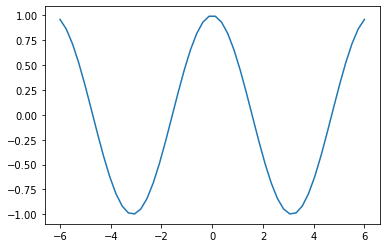

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))  # figsize indica largura x altura (opcional) 
ax.plot(x_grid, f_grid)
plt.show()               

Por padrão, a biblioteca interpola os pontos inseridos. Isso da a impressão de que de fato estamos trabalhando no mundo do contínuo (o que não é verdade, já que apenas informamos alguns pontos e seus respectivos valores na função de interesse). Para mostrar que isso é verdade, irei realizar o mesmo gráfico impondo que os pontos sejam graficados ao invés da interpolação automática: 

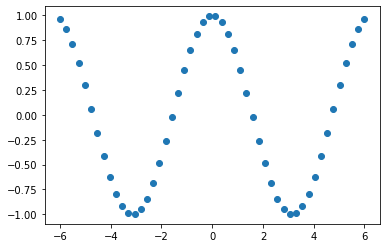

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.plot(x_grid, f_grid, linestyle = 'None', marker = 'o')
plt.show()

Vejamos o gráfico da função 

$$g(x) = \text{sen}(x), \quad x \in [-6,6]$$

para efeitos de comparação: 


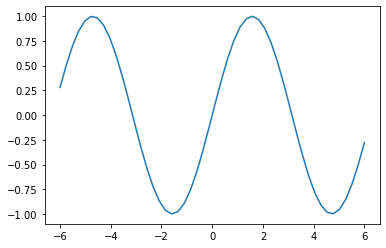

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
g_grid = np.sin(x_grid)
ax.plot(x_grid, g_grid)
plt.show()    

Um gráfico no matplotlib pode ser altamente customizado com outros comandos. Estes comandos não serão discutidos em detalhes, apenas irei demonstrar a funcionalidade de alguns deles neste mesmo exemplo. Na página https://matplotlib.org/3.1.1/api/pyplot_summary.html é possível ver detalhes destes, além de exemplos de referência (para fazermos um famoso CNTRL C + CNTRL V quando nos interessarmos).

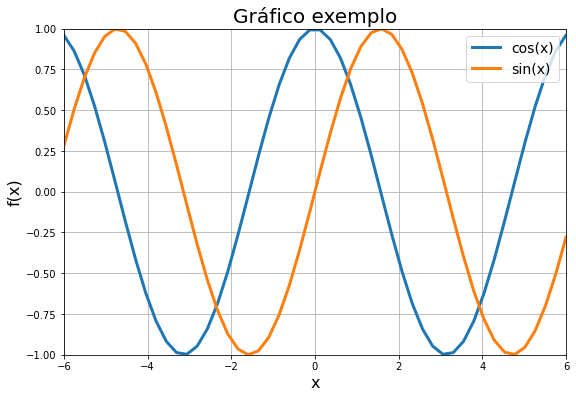

In [ ]:
# Gera uma nova figura, permitindo que seja definido o tamanho desejado dp gráfico final
fig, ax = plt.subplots(figsize = (9,6))
      

# Definir um título, informando um dicionário no comando opcional fontdict
# fontdict permite que seja definido o tamanho, cor e o tipo da fonte final
# Aqui eu apenas defini um novo tamanho
ax.set_title('Gráfico exemplo', fontdict = {'fontsize': 20} ) 

# Definindo um label para os eixos x e y do gráfico final
ax.set_xlabel('x', fontdict = {'fontsize': 16})
ax.set_ylabel('f(x)', fontdict = {'fontsize':16})

# Gerando gráfico das fblackunções seno e cosseno
# Irei aumentar o tamanho das linhas geradas usando linewidth
ax.plot(x_grid, f_grid, linewidth = 3)
ax.plot(x_grid, g_grid, linewidth = 3)

# Adicionando legenda para os plots no canto direito
ax.legend(['cos(x)', 'sin(x)'], loc = 'upper right', fontsize = 14)

# Limitando o espaço dos eixos x e y
ax.set_xlim(-6, 6)
ax.set_ylim(-1, 1)

# Mostrar grid 
ax.grid(True)

plt.show()


Em nosso curso de Álgebra Linear Algorítmica, estaremos interessados em também apresentar vetores na tela do computador. Veja em seguida como podemos fazer isso:

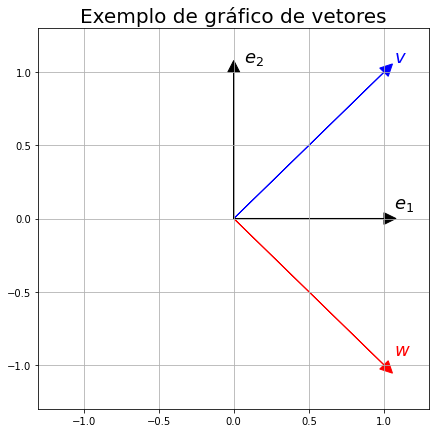

In [ ]:
p = np.array([0,0])  # Ponto de onde partirá o vetor
v = np.array([1,1])  # Definicao de um vetor v
w = np.array([1,-1]) # Definicao de um vetor w
e1 = np.array([1,0]) # Definicao do vetor e1
e2 = np.array([0,1]) # Definicao do vetor e1

# Instrucoes para o plot
fig, ax = plt.subplots(figsize = (7,7))
    
# Desenhando vetores
ax.arrow(*p, *v, head_width=0.08, head_length=0.08, color = 'blue')  # head width e head length permitem personalizar a seta 
ax.arrow(*p, *w, head_width=0.08, head_length=0.08, color = 'red') 
ax.arrow(*p, *e1, head_width=0.08, head_length=0.08, color = 'black') 
ax.arrow(*p, *e2, head_width=0.08, head_length=0.08, color = 'black')
# Usando o metodo anotate para inserir texto no plot. Aqui, usamos para colocar um label nos vetores
offset = 0.07
ax.annotate("$v$", p + v + offset, color = 'blue', size = 18 )  # legenda do vetor v
ax.annotate("$w$", p + w + offset, color = 'red', size = 18 )  # legenda do vetor w
ax.annotate("$e_1$", p + e1 + offset, color = 'black', size = 18 )  # legenda do vetor e1
ax.annotate("$e_2$", p + e2 + offset, color = 'black', size = 18 )  # legenda do vetor e2

# Inserindo titulo e definindo limites no plot
ax.set_title('Exemplo de gráfico de vetores', fontdict = {'fontsize': 20} ) 
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)

ax.grid(True)
plt.show()


### Animação com a biblioteca Matplotlib

Para realizarmos animações com a biblioteca matplotlib, é necessário importarmos os seguintes módulos:

```python
from matplotlib import animation
from IPython.display import HTML
```

In [ ]:
# importando módulos de animacao e de mudanca na página Web
from matplotlib import animation
from IPython.display import HTML

In [ ]:
# Criando janela de plot
fig, ax = plt.subplots(figsize = (6,6))
delay_time = 100  # tempo de transicao entre frames
nframes = 40      # numero de frames total

    
# funcao animate, chamada sequencialmente. Funciona de maneira analoga a for k in range(0,frames)
def animate(k):
    # Limpando a tela anterior
    ax.cla()
    # Atualizando vetores seguindo alguma regra. Aqui, seria "andar para tras"
    viter = v - v * k * 0.05 
    witer = w - w * k * 0.05    

    # Descrevendo o plot do proximo frame
    ax.arrow(*p, *viter, head_width=0.08, head_length=0.08, color = 'blue')
    ax.annotate("$v$", p + viter + offset, color = 'blue', size = 18 )
    ax.arrow(*p, *witer, head_width=0.08, head_length=0.08, color = 'red') 
    ax.annotate("$w$", p + witer + offset, color = 'red', size = 18 ) 

    ax.set_title('Exemplo de gráfico de vetores, iter {0}'.format(k), fontdict = {'fontsize': 20} ) 
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.grid(True)


    

    
anim = animation.FuncAnimation(fig, animate, 
                               frames = nframes, interval=delay_time);

plt.close()
HTML(anim.to_html5_video())